# Librerias

In [1]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar Dataset

In [2]:
df_region=pd.read_csv('internet_region_TS.csv')

# Predicción numero de usuarios

Por último, implementamos un modelo predictivo utilizando ARIMA. ARIMA es un modelo estadístico que utiliza variaciones y regresiones de datos estadísticos con el fin de encontrar patrones para una predicción hacia el futuro.<br>
Uno de los problemas con el dataset como ya se ha comentado era la falta de datos para el periodo 2016-2021. En la página del World Bank hemos podido completar la información para varios de los países, no obstante, no hemos podido hacerlo para todos.<br>
En esta sección, utilizamos la serie temporal **número de usuarios** desde 1990 hasta 2015 y utilizando el siguiente modelo ARIMA (p=2, d=3,q=1), predecimos los valores para los siguientes 10 periodos, es decir del 2016 al 2025. <br>
Para validar el modelo, dividimos los datos en train y test, y calculamos el RMSE(raíz del error cuadrático  medio). El RMSE de las diferencias entre los valores reales y predichos es 29119.656. Teniendo en cuenta las cifras que se intentan predecir son miles de millones, éste es un error pequeño.<br>
Además, el nuevo informe ‘Digital 2022 April Global Statshot’ , sobre número de usuarios de internet, revela que la cifra mundial para el 2021 sobrepasa los 5 mil millones, comprobamos que el resultado de nuestro modelo también es así.<br>
Gracias al modelo, podemos dibujar la evolución del número de usuarios mundiales desde 2016 hasta 2021, completando nuestro estudio, y predecir los siguientes años. Comprobamos que la tendencia general es que cada año se incrementa de exponencialmente el número de usuarios. Como bien señalan diversas fuentes, esto se debe a la penetración de los dispositivos móviles, podemos consultar más información en el siguiente enlace:Historia de Internet: ¿cómo nació y cuál fue su evolución? (marketing4ecommerce.net


In [3]:
mundo_pob=df_region[df_region['Entity']=='World']
mundo_pob= mundo_pob[['Year','Number of internet users (OWID based on WB & UN)']]
mundo_pob.head()

,Year,Number of internet users (OWID based on WB & UN)
1961,1990,2630452.0
1962,1991,NaN
1963,1992,NaN
1964,1993,14073444.0
1965,1994,25348069.0


In [4]:
mundo_pob.tail()

,Year,Number of internet users (OWID based on WB & UN)
1984,2013,2.649105e+09
1985,2014,2.902737e+09
1986,2015,3.175188e+09
1987,2016,3.419398e+09
1988,2017,NaN


In [5]:
mundo_pob.set_index('Year',inplace=True)

In [6]:
mundo_pob.drop(2017, axis=0, inplace=True)

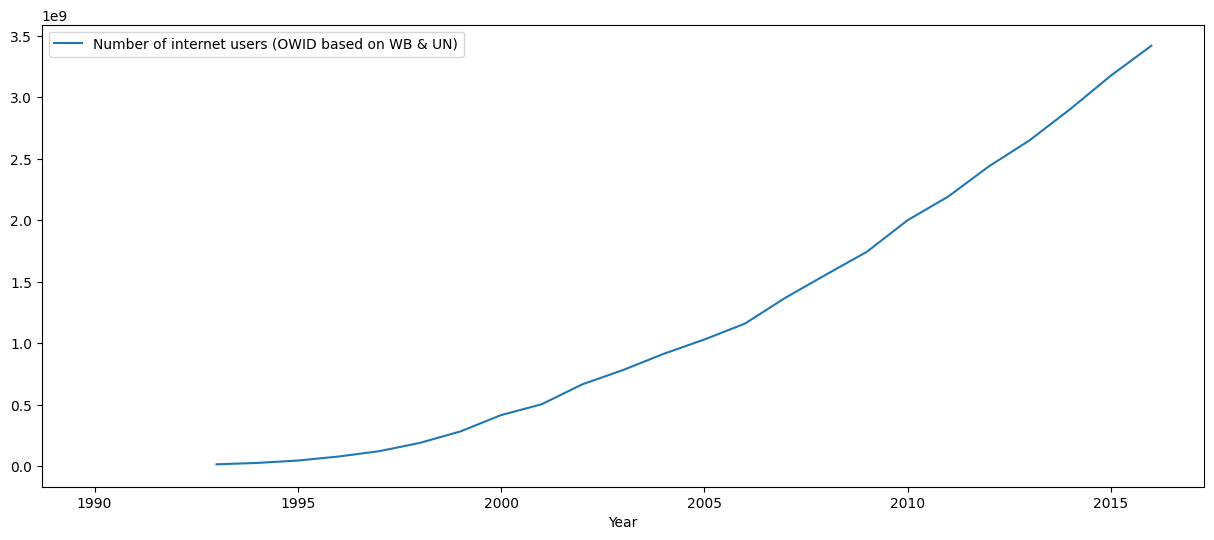

In [7]:
series_pob=mundo_pob.copy()
series_pob.plot(figsize=(15, 6))
plt.show()

In [8]:
series_pob.dropna(inplace=True)

In [9]:
series_pob.isnull().sum()

Number of internet users (OWID based on WB & UN)    0
dtype: int64

c:\Users\Jose Antonio\samplerepo\venv_analytics\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


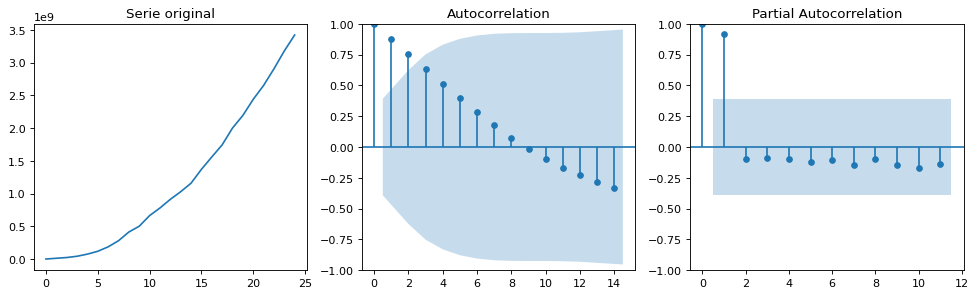

In [10]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Serie original')
ax1.plot(series_pob.values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series_pob.values, ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series_pob.values,lags=11, ax=ax3)
plt.show()

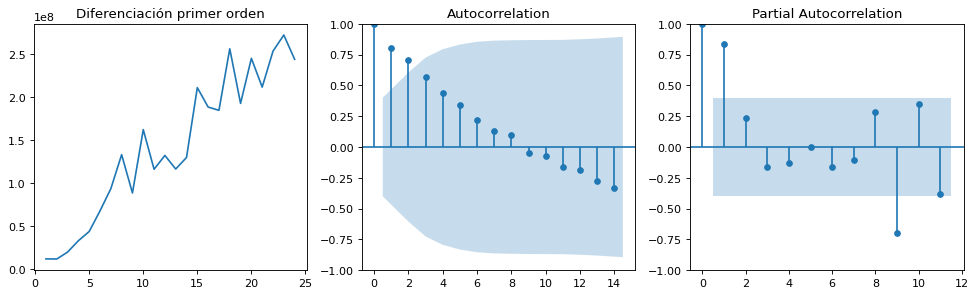

In [11]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Diferenciación primer orden')
ax1.plot(series_pob.diff().values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series_pob.diff().dropna(), ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series_pob.diff().dropna(),lags=11, ax=ax3)
plt.show()

In [12]:
# Librerías
from statsmodels.tsa.stattools import adfuller
# Resultados
print(f"p-valor diferenciación orden cero: {adfuller(series_pob)[1]}")
print(f"p-valor diferenciación orden uno: {adfuller(series_pob.diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(series_pob.diff().diff().dropna())[1]}")
print(f"p-valor diferenciación orden tres: {adfuller(series_pob.diff().diff().diff().dropna())[1]}")

p-valor diferenciación orden cero: 0.9819351915562885
p-valor diferenciación orden uno: 0.9772608475624741
p-valor diferenciación orden dos: 0.33800107580712624
p-valor diferenciación orden tres: 0.007746788107915989


c:\Users\Jose Antonio\samplerepo\venv_analytics\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


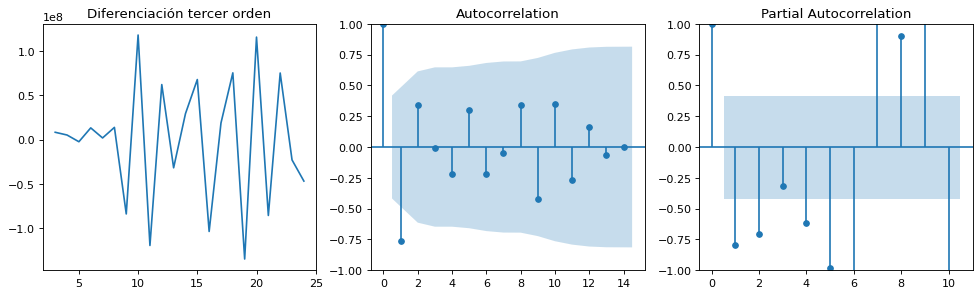

In [13]:
# Librerías
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Diferenciación tercer orden')
ax1.plot(series_pob.diff().diff().diff().values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(series_pob.diff().diff().diff().dropna(), ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(series_pob.diff().diff().diff().dropna(),lags=10, ax=ax3)
plt.show()

In [14]:
# Librerías
from statsmodels.tsa.arima.model import ARIMA
# Ajustamos modelo a datos
model = ARIMA(series_pob.values, order=(2,3,1))
model_fit = model.fit()
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(2, 3, 1)   Log Likelihood                -410.961
Date:                Tue, 22 Nov 2022   AIC                            829.921
Time:                        20:26:47   BIC                            834.285
Sample:                             0   HQIC                           830.949
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8890      0.376     -2.363      0.018      -1.626      -0.151
ar.L2         -0.3342      0.326     -1.025      0.306      -0.973       0.305
ma.L1         -0.9386      0.442     -2.123      0.0

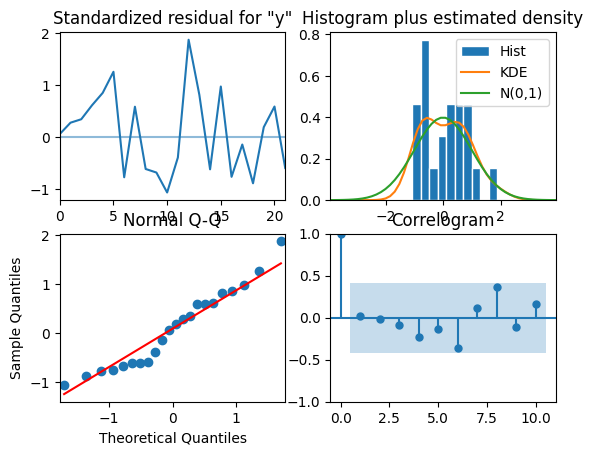

In [15]:
model_fit.plot_diagnostics()
plt.show()

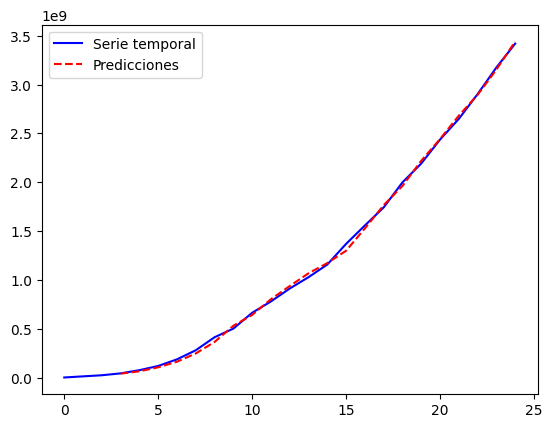

In [16]:
p = 2 # Coeficientes de autoregresión
d = 3 # Orden de diferenciación
q = 1 # Ajuste media móvil
# Ajustamos modelo a datos
model = ARIMA(series_pob.values, order=(p,d,q))
model_fit = model.fit()
# Tomamos predicciones
preds = model_fit.predict()
# Creamos figura
fig, ax = plt.subplots()
ax.plot(range(len(series_pob)), series_pob.values, 'b-')
ax.plot(range(d,len(series_pob)), preds[d:], 'r--')
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

Predicho=1551470821.464236, Valor real=1558290574.000000
Predicho=1847913580.594700, Valor real=1742929484.000000
Predicho=1953827979.610875, Valor real=1999332784.000000
Predicho=2230531960.046649, Valor real=2192101639.000000
Predicho=2439791366.001700, Valor real=2437368309.000000
Predicho=2685883229.327445, Valor real=2649104793.000000
Predicho=2896818078.647836, Valor real=2902737310.000000
Predicho=3150750542.762678, Valor real=3175188441.000000
Predicho=3443152824.558671, Valor real=3419398061.000000
Test RMSE: 29119.656


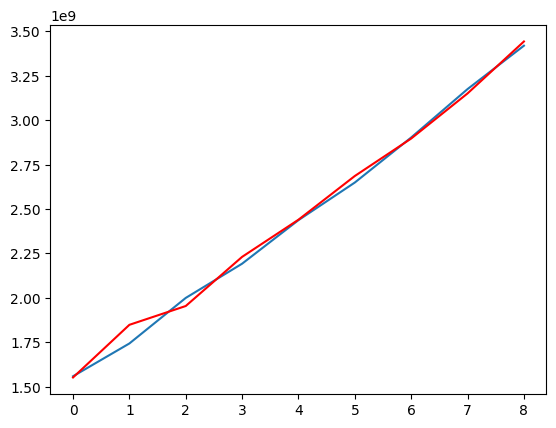

In [17]:
# Partimos datos para asegurar una validación final
# en datos test
X = series_pob.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# Walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,3,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicho=%f, Valor real=%f' % (yhat, obs))
# Evaluamos los resultados
metric = lambda x,y : np.sqrt(np.mean((x-y)**2))
rmse = np.sqrt(metric(test, predictions))
print('Test RMSE: %.3f' % rmse)
# Dibujamos valor real y predicho
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

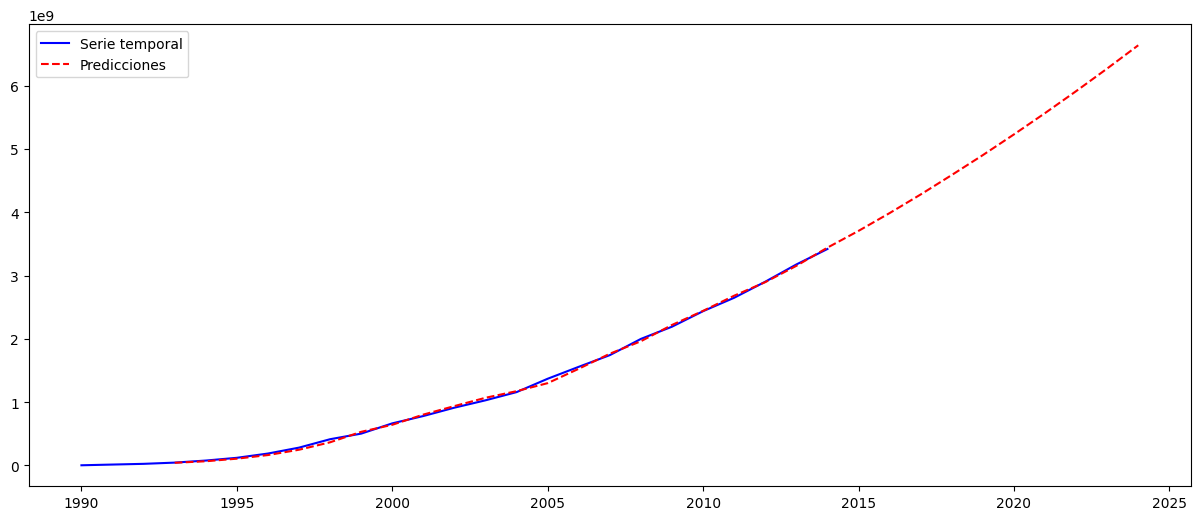

In [18]:
p = 2 # Coeficientes de autoregresión
d = 3 # Orden de diferenciación
q = 1 # Ajuste media móvil
n = 10 # número de predicciones
series_pob_2 = series_pob.values


for _ in range(n): 
    model = ARIMA(series_pob_2, order=(p,d,q))
    model_fit = model.fit()
    preds = model_fit.predict()
    series_pob_2 = np.append(series_pob_2, model_fit.forecast()[0], axis=None)
    preds = np.append(preds, model_fit.forecast()[0], axis=None)



fig, ax = plt.subplots(figsize=(15, 6))
ax.plot([x+1990 for x in range(len(series_pob))], series_pob.values, 'b-')
ax.plot([x+1990 for x in range(d,len(series_pob)+n)], preds[d:], 'r--')
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

In [19]:
preds

array([0.00000000e+00, 5.84807718e+06, 2.48709625e+07, 4.20758867e+07,
       6.59402527e+07, 1.06922997e+08, 1.64055390e+08, 2.48266695e+08,
       3.65799084e+08, 5.31338358e+08, 6.42285321e+08, 8.03395607e+08,
       9.38047235e+08, 1.06901221e+09, 1.17365209e+09, 1.30029647e+09,
       1.52746270e+09, 1.76519550e+09, 1.96283754e+09, 2.21965292e+09,
       2.44221586e+09, 2.68188360e+09, 2.89572817e+09, 3.15345090e+09,
       3.44104464e+09, 3.70554168e+09, 3.98677653e+09, 4.28112237e+09,
       4.58847454e+09, 4.90291370e+09, 5.22974065e+09, 5.56622825e+09,
       5.91303834e+09, 6.27049961e+09, 6.63810405e+09])